## Task 1:-
Prepare a complete data analysis report on the given data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('Cell_Phone_Price.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Basic checks

In [4]:
data.head(pd.set_option('display.max_columns',None))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [5]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
data.shape

(2000, 21)

In [9]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
num_column=[feature for feature in data.columns if data[feature].dtype !='O']
cat_column=[feature for feature in data.columns if data [feature].dtype=='O']

print('We have {} numerical columns:{}'.format(len(num_column),num_column))
print('\nWe have {} categorical columns:{}'.format(len(cat_column),cat_column))

We have 21 numerical columns:['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

We have 0 categorical columns:[]


## EDA (Exploratory Data Analysis)

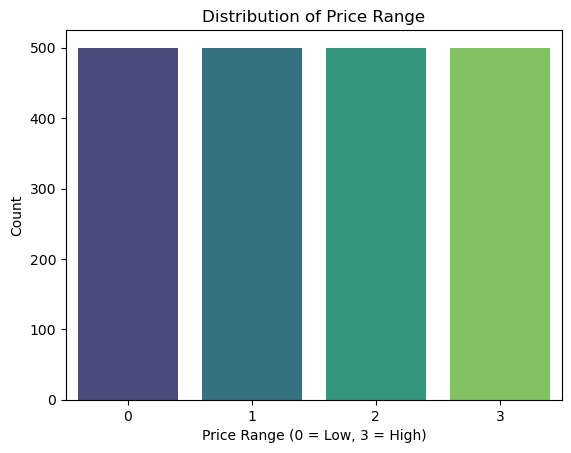

In [12]:
# Distribution of Target Variable (price_range)
sns.countplot(x='price_range', data=data, palette='viridis')
plt.title("Distribution of Price Range")
plt.xlabel("Price Range (0 = Low, 3 = High)")
plt.ylabel("Count")
plt.show()

In [13]:
#differentiating between continuous and discrete features

#1.Discrete feature
discrete_features=[feature for feature in data if len(data[feature].unique())<150]
print('Discrete Variables Count:()',format(len(discrete_features)))
discrete_features

Discrete Variables Count:() 17


['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [14]:
#2.Continuous features
con_features=[feature for feature in data if feature not in discrete_features]
print('Continuous Features Count:',format(len(con_features)))
con_features

Continuous Features Count: 4


['battery_power', 'px_height', 'px_width', 'ram']

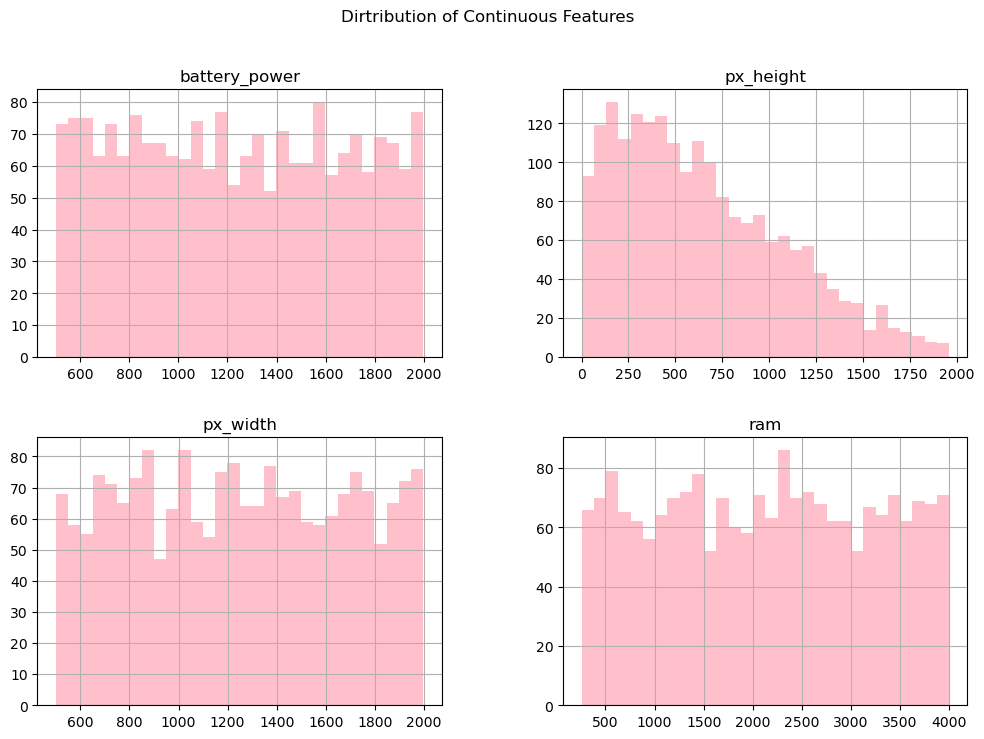

In [15]:
# Histograms of Continuous Features
data[['battery_power', 'px_height', 'px_width', 'ram']].hist(bins=30,figsize=(12,8),color='pink')
plt.suptitle('Dirtribution of Continuous Features')
plt.show()

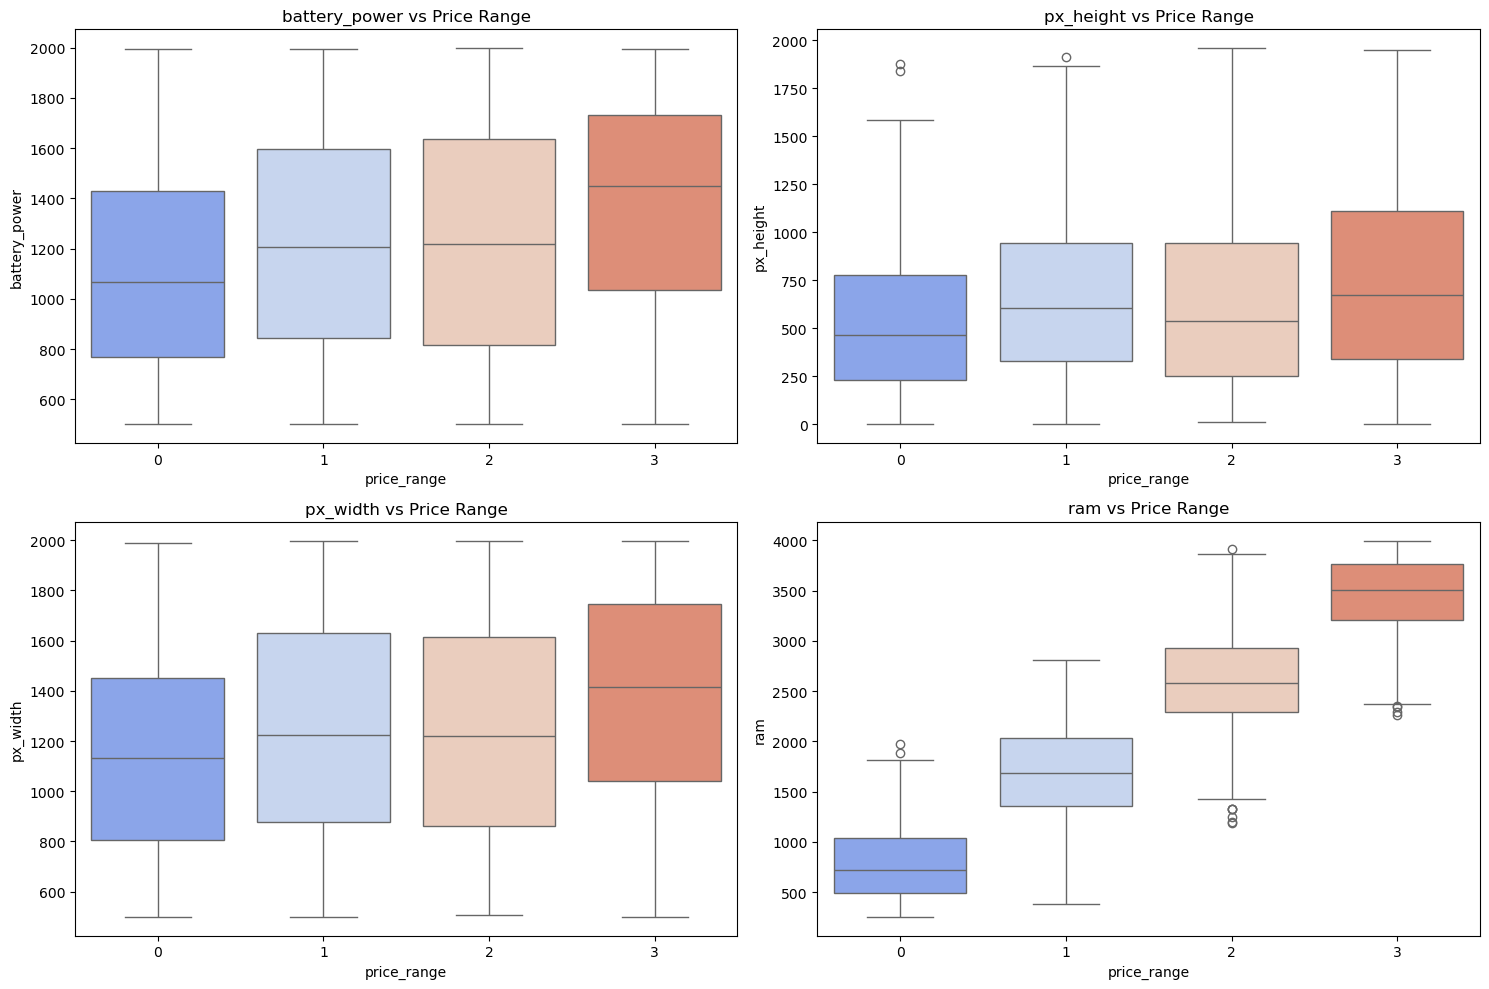

In [16]:
# Boxplots for Continuous Features by Price Range
plt.figure(figsize=(15,10))
for i, col in enumerate(['battery_power', 'px_height', 'px_width', 'ram'],1):
    plt.subplot(2,2,i)
    sns.boxplot(x='price_range',y=col, data=data, palette='coolwarm')
    plt.title(f'{col} vs Price Range')

plt.tight_layout()
plt.show()
    

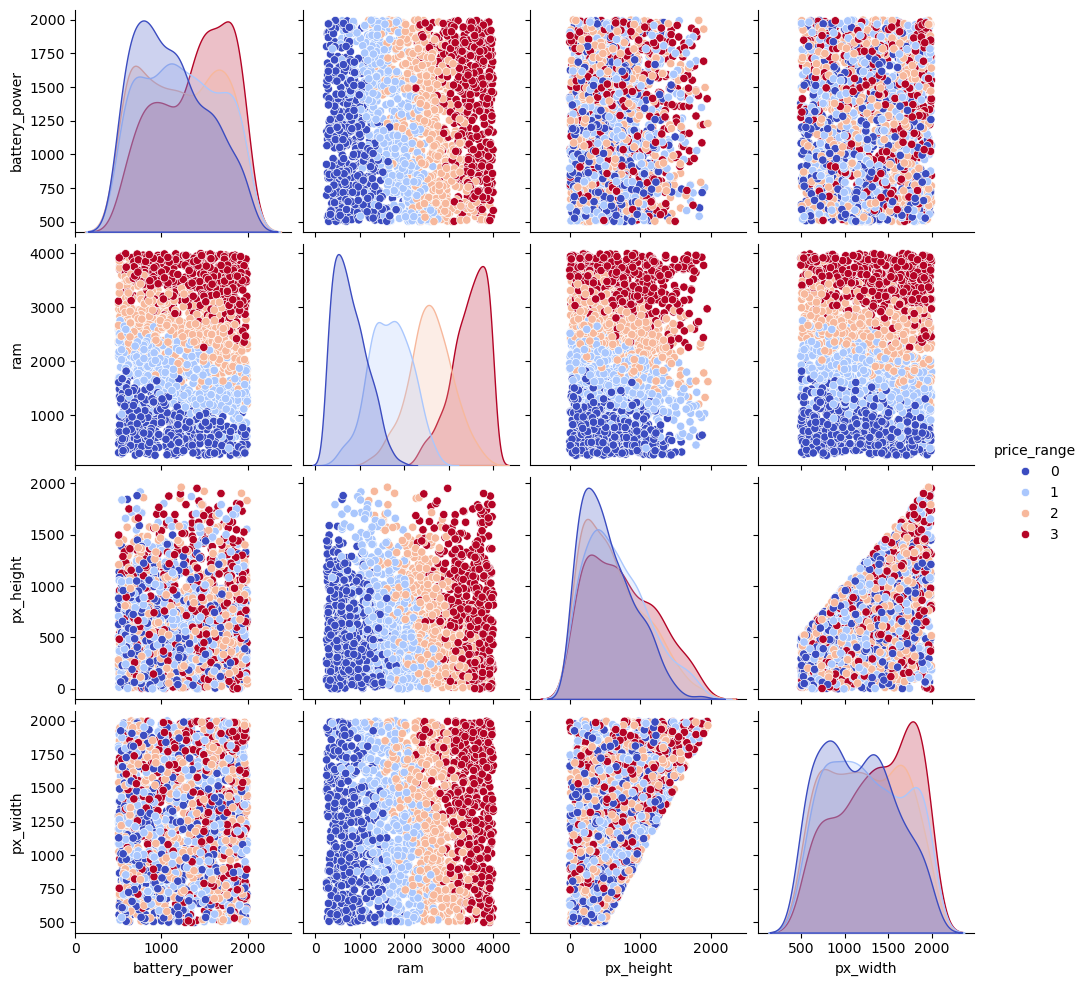

In [17]:
# Pairplot for Selected Features
selected_features=['battery_power', 'ram', 'px_height', 'px_width', 'price_range']
sns.pairplot(data[selected_features],hue='price_range',palette='coolwarm')
plt.show()

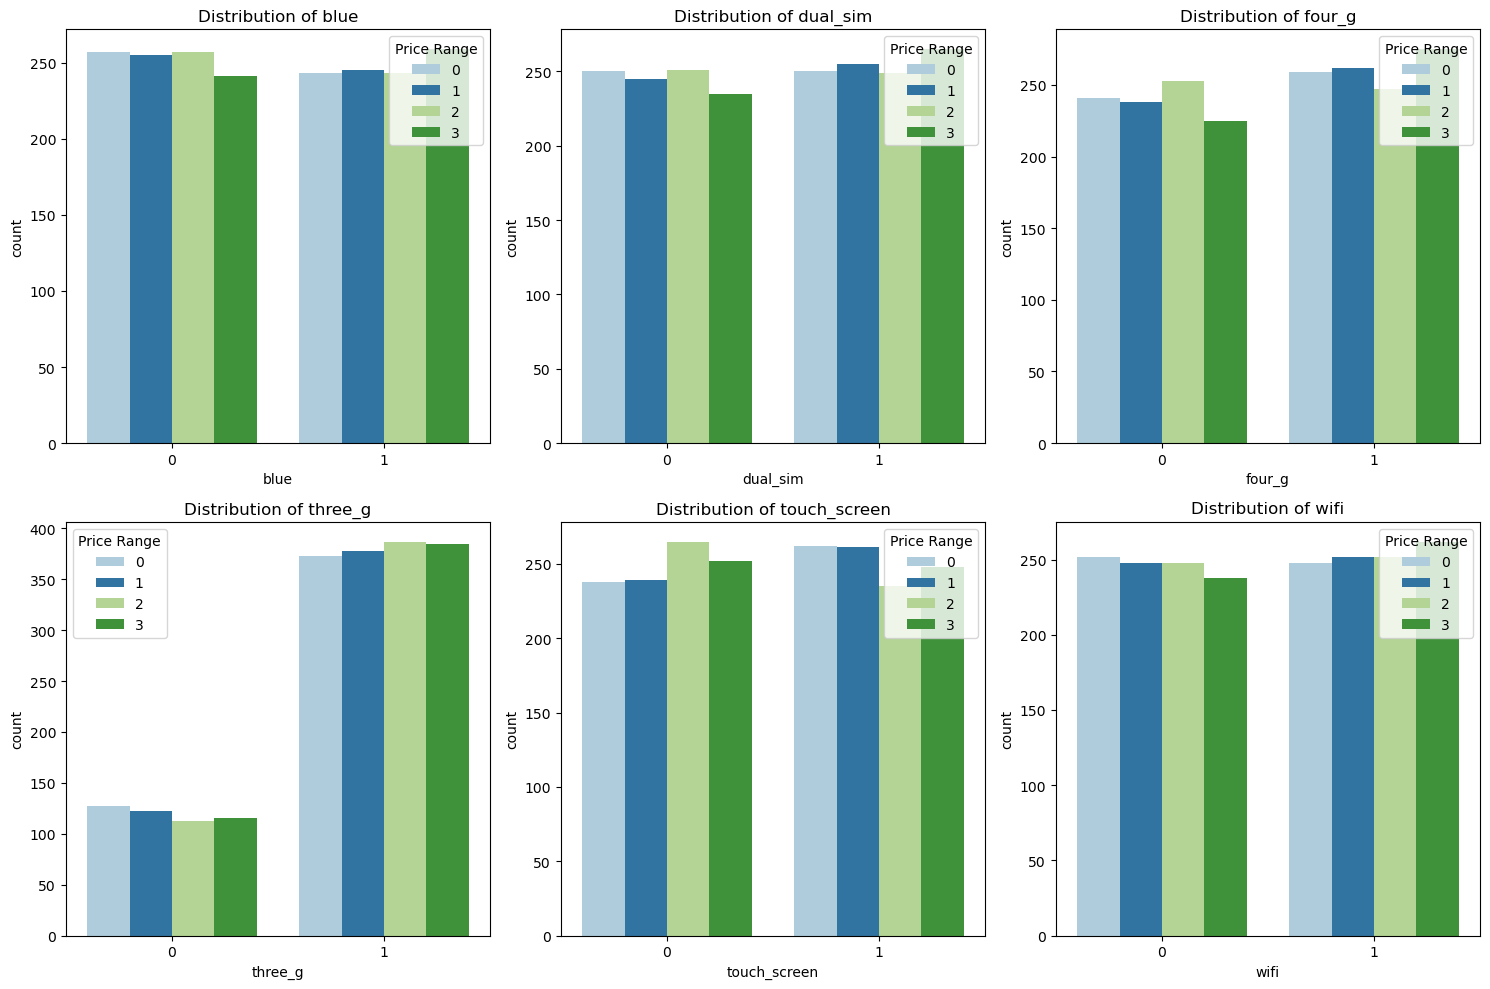

In [18]:
# Countplots for Binary Features
binary_features=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
plt.figure(figsize=(15,10))
for i, col in enumerate(binary_features, 1):
    plt.subplot(2,3,i)
    sns.countplot(x=col, hue='price_range', data=data, palette='Paired')
    plt.title(f'Distribution of {col}')
    plt.legend(title='Price Range')

plt.tight_layout()
plt.show()


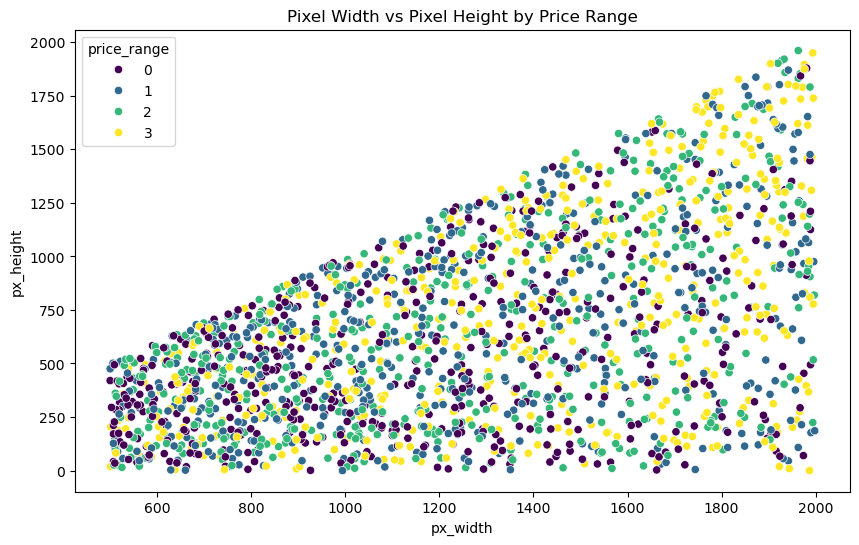

In [19]:
# Scatterplot for Resolution Features
plt.figure(figsize=(10,6))
sns.scatterplot(x='px_width', y='px_height', hue='price_range', data=data, palette='viridis')
plt.title('Pixel Width vs Pixel Height by Price Range')
plt.show()


## Data Pre-Processing

### Handling Null Values

In [22]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [23]:
if data.isnull().sum().sum() == 0:
    print('No missing values found.')
else:
    print('Missing values detected. Handling missing values...')

No missing values found.


### Check for Duplicates


In [25]:
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f'found {duplicates} duplicate rows. Removing duplicates....')
    data=data.drop_duplicates()
else:
    print('No duplicate data found')

No duplicate data found


### Encoding

In [27]:
num_column=[feature for feature in data.columns if data[feature].dtype !='O']
cat_column=[feature for feature in data.columns if data [feature].dtype=='O']

print('We have {} numerical columns:{}'.format(len(num_column),num_column))
print('\nWe have {} categorical columns:{}'.format(len(cat_column),cat_column))

We have 21 numerical columns:['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

We have 0 categorical columns:[]


### Handling Outliers

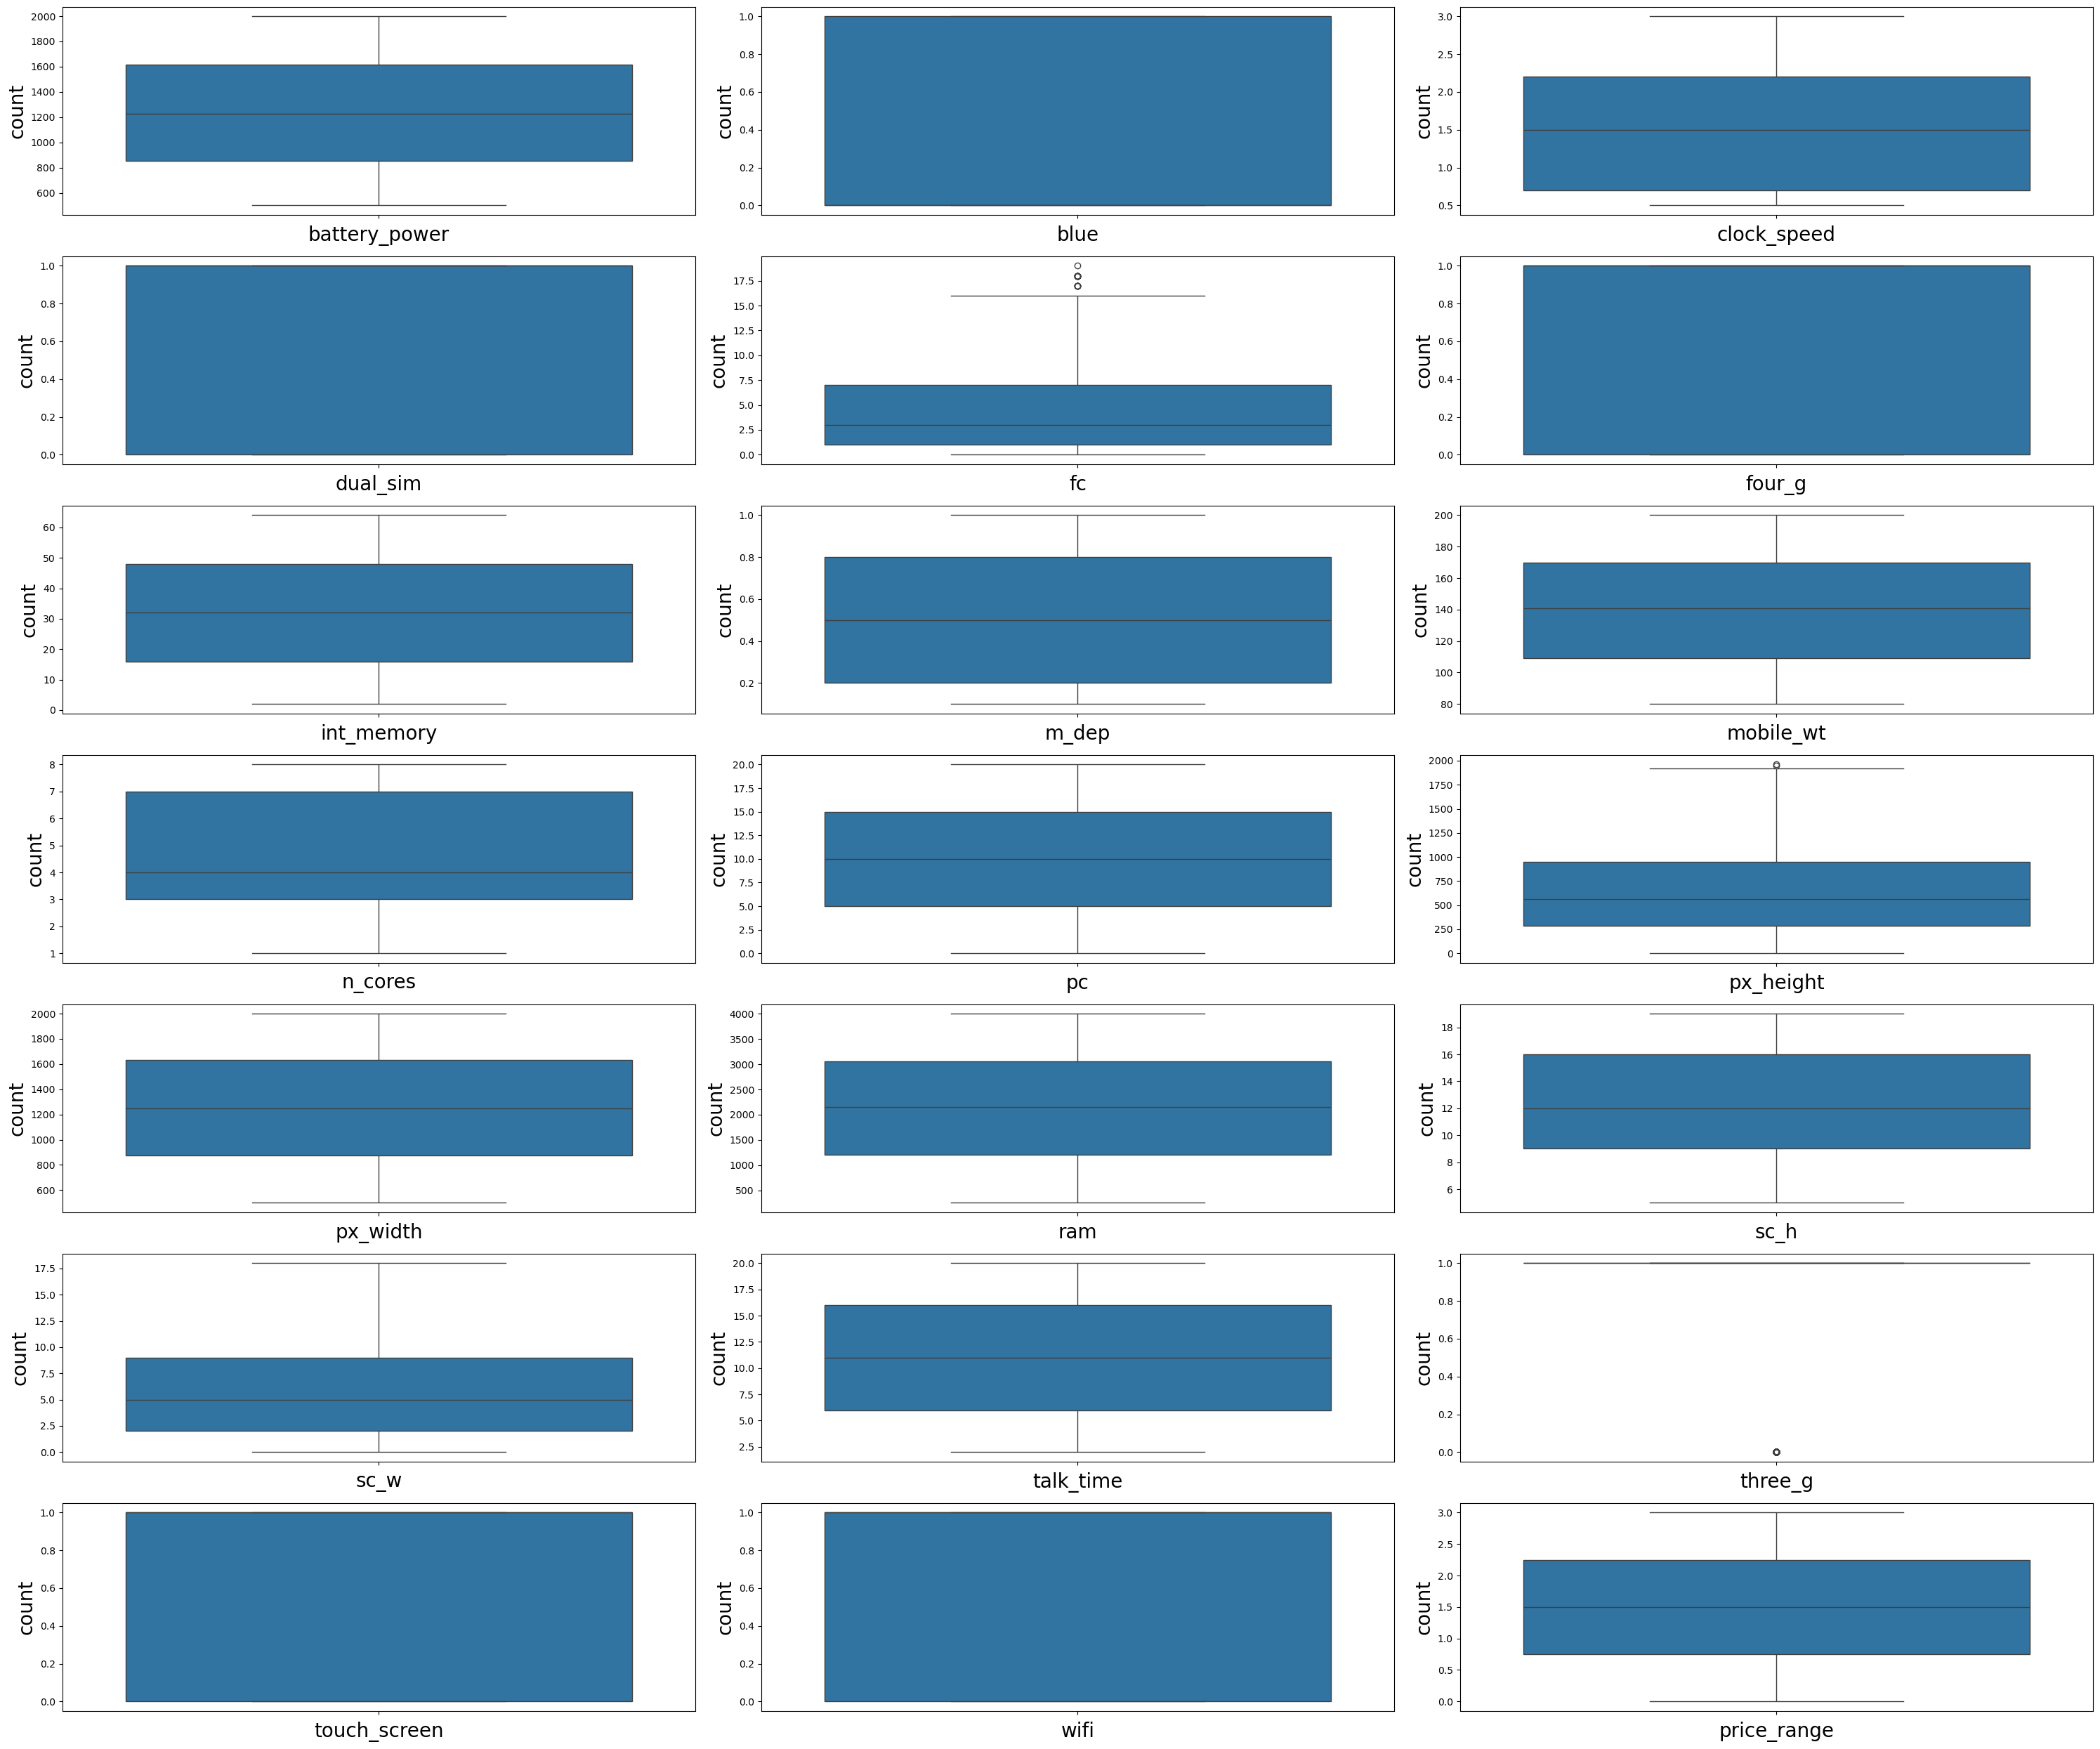

In [29]:
plt.figure(figsize=(30,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber <=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

##### 1.fc

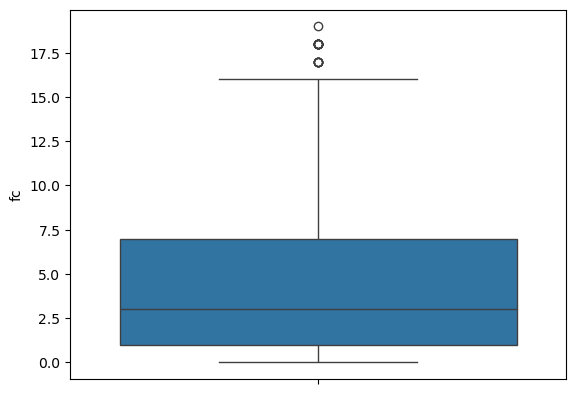

In [31]:
sns.boxplot(data['fc'])
plt.show()

In [32]:
IQR = stats.iqr(data.fc, interpolation = 'midpoint') 
IQR

6.0

In [33]:
# First quartile (Q1) 
Q1 = data.fc.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.fc.quantile(0.75)

In [34]:
iqr = Q3-Q1
print(iqr)

6.0


In [35]:
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [36]:
max_limit

16.0

In [37]:
min_limit

-8.0

In [38]:
data.loc[data['fc'] > max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,19,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,20,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,19,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,18,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,19,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,20,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,19,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,20,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,20,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,20,142,1039,1220,9,3,20,0,1,0,1


In [39]:
data.loc[data['fc'] < min_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [40]:
data.loc[data['fc'] > max_limit,'fc']=np.median(data.fc)

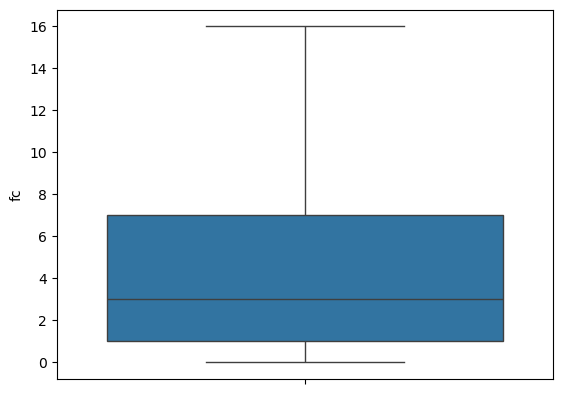

In [41]:
sns.boxplot(data['fc'])
plt.show()

##### 2.px_height

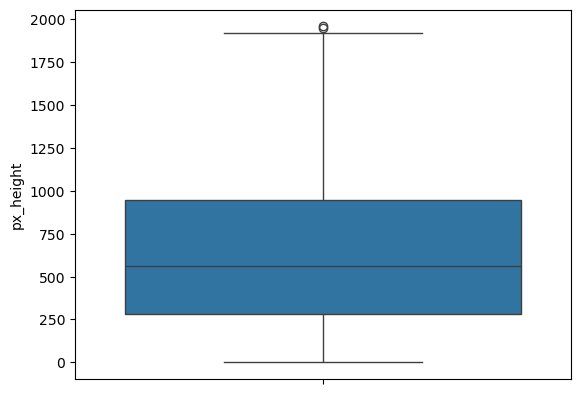

In [43]:
sns.boxplot(data['px_height'])
plt.show()

In [44]:
Q1=data.px_height.quantile(0.25)
Q3=data.px_height.quantile(0.75)
IQR= Q3-Q1
IQR

664.5

In [45]:
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

In [46]:
data.loc[data['px_height'] > max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,6,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,2,1960,1963,1622,18,17,16,1,1,1,2


In [47]:
data.loc[data['px_height'] < min_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [48]:
data.loc[data['px_height'] > max_limit,'px_height']=np.median(data.px_height)

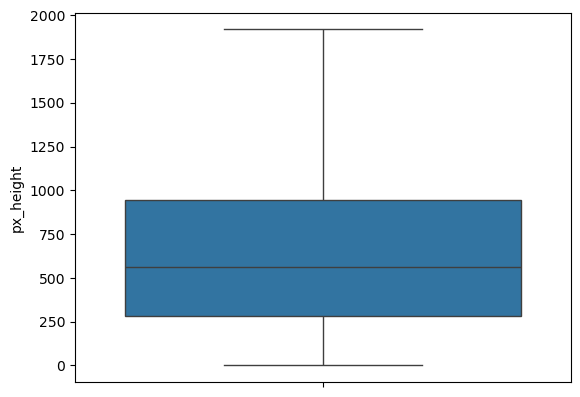

In [49]:
sns.boxplot(data.px_height)
plt.show()

##### 3.three_g

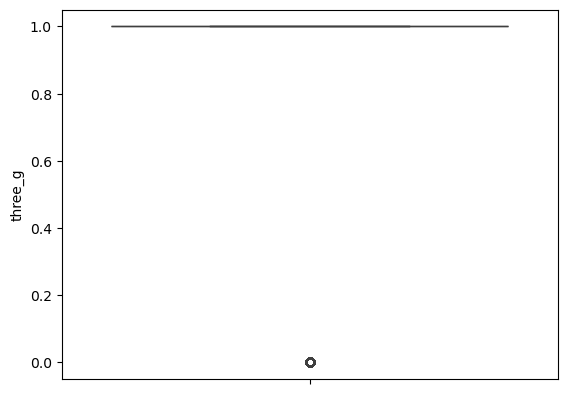

In [51]:
sns.boxplot(data['three_g'])
plt.show()

In [52]:
Q1=data.three_g.quantile(0.25)
Q3=data.three_g.quantile(0.75)
IQR=Q3-Q1
IQR

0.0

In [53]:
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [54]:
data.loc[data['three_g'] > max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [55]:
data.loc[data['three_g'] < min_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
10,769,1,2.9,1,0,0,9,0.1,182,5,1,248,874,3946,5,2,7,0,0,0,3
19,682,1,0.5,0,4,0,19,1.0,121,4,11,902,1064,2337,11,1,18,0,1,1,1
22,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,0,0,1,1
30,1579,1,0.5,1,0,0,5,0.2,88,7,9,1358,1739,3532,17,11,12,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,0,2.6,0,8,0,6,0.4,199,3,20,698,1018,1300,10,0,2,0,0,1,1
1982,1784,0,1.6,0,4,0,41,0.4,164,6,20,610,1437,2313,14,1,11,0,1,0,2
1983,1262,0,1.8,1,12,0,34,0.1,149,5,16,223,737,3248,13,3,4,0,1,1,2
1988,1547,1,2.9,0,2,0,57,0.4,114,1,3,347,957,1620,9,2,19,0,1,1,1


In [56]:
data.loc[data['three_g'] > max_limit,'three_g']=np.median(data.three_g)

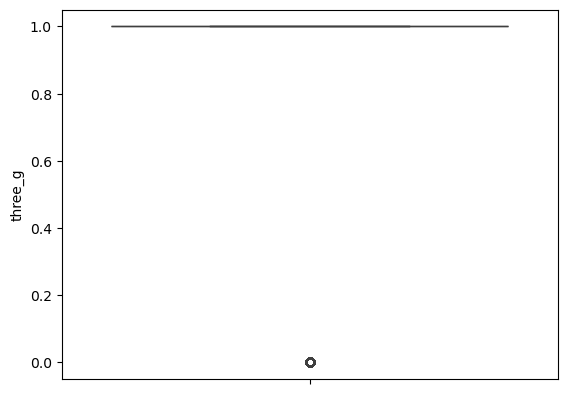

In [57]:
sns.boxplot(data.three_g)
plt.show()

In [58]:
data.three_g=np.sqrt(data.three_g)

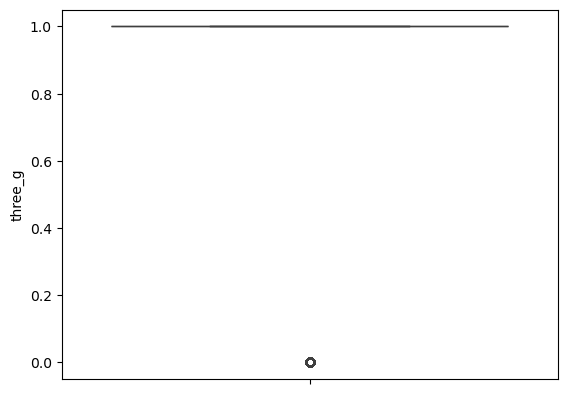

In [59]:
sns.boxplot(data.three_g)
plt.show()

## Feature Selection

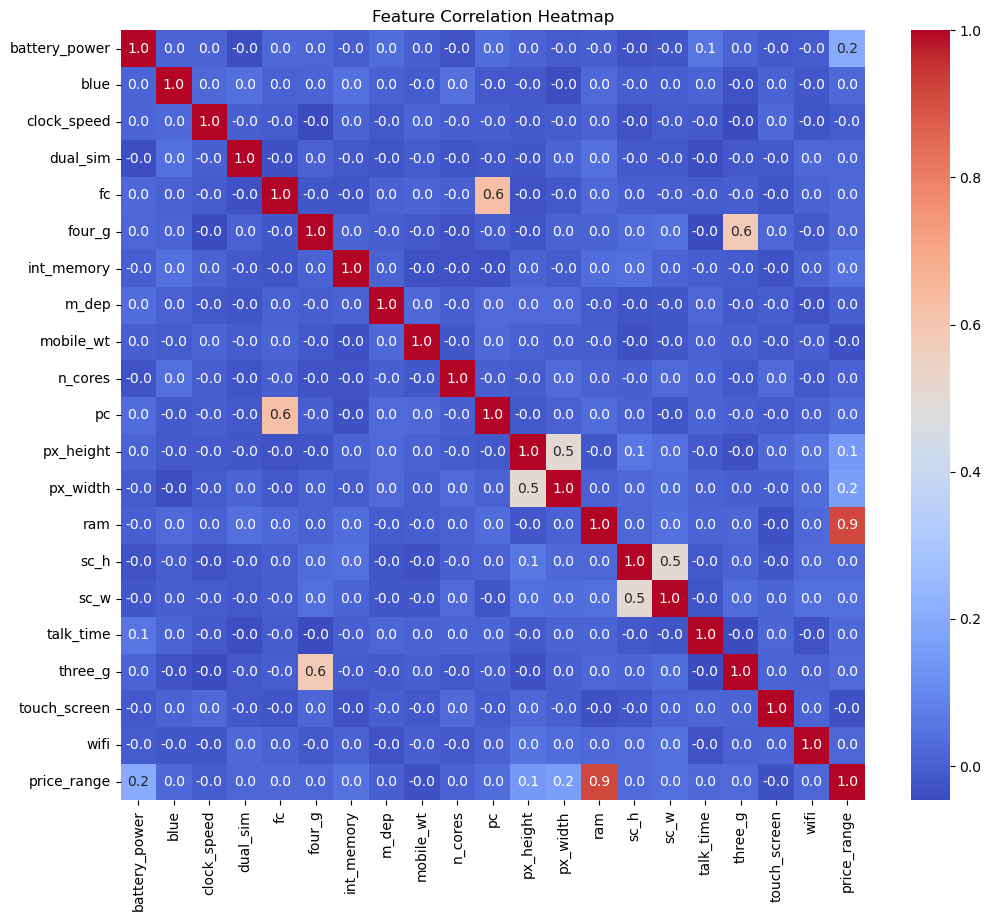

In [61]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [63]:
# Analysis of feature importance using correlation with price_range
correlations_with_price = corr_matrix['price_range'].sort_values(ascending=False)
print("\nCorrelation of Features with Price Range:")
print(correlations_with_price)


Correlation of Features with Price Range:
price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.146698
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
talk_time        0.021859
blue             0.020573
fc               0.020479
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


## Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
d=['price_range']
data1=sc.fit_transform(data.drop(d,axis=1))
data1

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [67]:
con_data=data['price_range']
con_data

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [69]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [71]:
type(data1)
data2=pd.DataFrame(data1,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])
data2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.765716,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.411960,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-1.006735,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.591487,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.524698,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.401921,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-1.006735,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.295523,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.126507,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.277413,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-1.006735,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.309105,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-1.006735,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.614124,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.765716,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.507727,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.042660,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696605,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


In [73]:
final_df=pd.concat([data2,con_data],axis=1)
final_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.765716,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.411960,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-1.006735,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.591487,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.524698,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.401921,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-1.006735,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.295523,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.126507,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.277413,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-1.006735,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.309105,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099,0
1996,1.653694,1.010051,1.321096,0.981177,-1.006735,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.614124,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097,2
1997,1.530773,-0.990050,-0.762748,0.981177,-0.765716,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.507727,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099,3
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.042660,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696605,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097,0


## Balancing

In [76]:
final_df.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

* The given dataset is already balanced therefore there is no need to perform balancing

## Train-Test Split

In [80]:
x=final_df.iloc[:,:-1]
y=final_df.price_range

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Model Creation

### 1.LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report

# Initialize and train the Logistic Regression model
lr=LogisticRegression()
lr.fit(x_train,y_train)

# Make predictions on the test set
lr_pred=lr.predict(x_test)
lr_pred


In [ ]:
cr=classification_report(y_test,lr_pred)
print(cr)

##### Hyperparameter Tuning of Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'], # Regularization type
    'solver': ['saga'],                    # Compatible solver
    'multi_class': ['multinomial']         # Multi-class strategy
}

# Initialize the model
lr = LogisticRegression(max_iter=1000)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(x_train, y_train)

# Best parameters and model performance
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

# Use the best model to make predictions
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(x_test)

# Evaluate the tuned model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

### 2.SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC

# Initialize and train the Logistic Regression model
svc=SVC()
svc.fit(x_train,y_train)

# Make predictions on the test set
svc_pred=svc.predict(x_test)
svc_pred


In [ ]:
cr=classification_report(y_test,svc_pred)
print(cr)

##### Hyperparameter Tuning Of Support Vector Classifier

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100],  # Kernel coefficient
    'degree': [2, 3, 4],  # Degree of the polynomial kernel (only for 'poly')
    'class_weight': [None, 'balanced']  # Handling class imbalance
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=5,  # 5-Fold Cross-Validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

### 3.Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Logistic Regression model
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

# Make predictions on the test set
rf_pred=RF.predict(x_test)
rf_pred

In [ ]:
cr=classification_report(y_test,rf_pred)
print(cr)

In [133]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


# Define a dictionary of classification models
models = {
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Artificial Neural Network": MLPClassifier( hidden_layer_sizes=(200,50),
                                              learning_rate_init=0.01, max_iter=100,random_state=42),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Apply each model and evaluate performance
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(x_train, y_train)
    # Predict on the test set
    y_pred = model.predict(x_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Store results
    results[model_name] = accuracy
    # Print performance metrics
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Display a comparison of model performance
print("\nModel Performance Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

Training AdaBoost...

AdaBoost Results:
Accuracy: 0.6480
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.25      0.40       132
           1       0.47      0.90      0.62       118
           2       0.69      0.68      0.69       120
           3       0.86      0.79      0.82       130

    accuracy                           0.65       500
   macro avg       0.74      0.66      0.63       500
weighted avg       0.75      0.65      0.63       500

--------------------------------------------------
Training Support Vector Classifier...

Support Vector Classifier Results:
Accuracy: 0.8740
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       132
           1       0.77      0.85      0.81       118
           2       0.85      0.81      0.83       120
           3       0.95      0.93      0.94       130

    accuracy                           0.87     

In [134]:
final_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.765716,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.411960,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-1.006735,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.591487,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.524698,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.401921,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-1.006735,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.295523,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.126507,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.277413,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-1.006735,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.309105,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099,0
1996,1.653694,1.010051,1.321096,0.981177,-1.006735,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.614124,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097,2
1997,1.530773,-0.990050,-0.762748,0.981177,-0.765716,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.507727,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099,3
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.042660,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696605,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097,0


In [135]:
input_data=(-1.658331,	1.010051,	0.585621,	0.981177,	0.198358,	0.957886,	0.714039,	1.381165,	0.784130,	0.646842,	1.003414,	
            -0.363829,	-1.151413, 1.655004,	1.589078,	-0.405712,	-1.649584,	0.559641,	0.994018,	0.986097		)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[3]


# Task 2:-
On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

In [140]:
new_mobile = pd.DataFrame({
    'battery_power': [1200],
    'blue': [1],
    'clock_speed': [2.5],
    'dual_sim': [1],
    'fc': [5],
    'four_g': [1],
    'int_memory': [16],
    'm_dep': [0.6],
    'mobile_wt': [150],
    'n_cores': [4],
    'pc': [10],
    'px_height': [800],
    'px_width': [1200],
    'ram': [4000],
    'sc_h': [12],
    'sc_w': [7],
    'talk_time': [15],
    'three_g': [1],
    'touch_screen': [1],
    'wifi': [1]
})

predicted_price_range = model.predict(new_mobile)
print("\nPredicted Price Range for New Mobile:", predicted_price_range[0])


Predicted Price Range for New Mobile: 3



Feature Importance:
           Feature  Importance
13            ram    7.004265
0   battery_power    1.769765
11      px_height    1.012809
12       px_width    1.001228
8       mobile_wt    0.298176
6      int_memory    0.151825
7           m_dep    0.105726
9         n_cores    0.089826
14           sc_h    0.084670
15           sc_w    0.065090
19           wifi    0.060077
16      talk_time    0.058836
2     clock_speed    0.058385
3        dual_sim    0.055738
18   touch_screen    0.051022
17        three_g    0.046795
5          four_g    0.039435
4              fc    0.026472
1            blue    0.018921
10             pc    0.017406


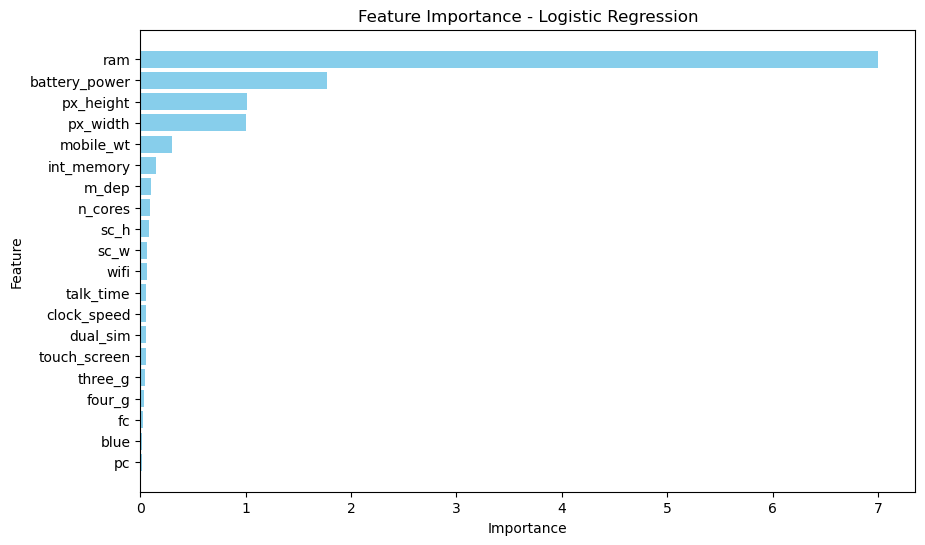


Business Insights:
Top 5 features influencing price range: ram, battery_power, px_height, px_width, mobile_wt

1. Focus on improving the top features (e.g., RAM, battery power) to enhance product offerings.
2. Use the model to segment customers into price ranges and design marketing strategies accordingly.
3. The model's accuracy shows it can reliably predict price ranges, helping with better pricing strategies.
4. Target high-demand specifications in future mobile releases to remain competitive.



In [147]:
# Analyze feature importance
feature_importance = np.abs(model.coef_).mean(axis=0)  # Coefficients as feature importance
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()  # Reverse order for better visualization
plt.show()

# Insights for Business Expansion
print("\nBusiness Insights:")
top_features = feature_importance_df.head(5)['Feature'].tolist()
print(f"Top 5 features influencing price range: {', '.join(top_features)}")
print("""
1. Focus on improving the top features (e.g., RAM, battery power) to enhance product offerings.
2. Use the model to segment customers into price ranges and design marketing strategies accordingly.
3. The model's accuracy shows it can reliably predict price ranges, helping with better pricing strategies.
4. Target high-demand specifications in future mobile releases to remain competitive.
""")

In [ ]:
1. Feature Optimization Insights
RAM: Since RAM is the most important feature influencing price, focus on releasing models with varying RAM options (e.g., 4GB, 8GB, 12GB) at competitive prices. This will cater to different customer segments:
Budget buyers (low RAM).
Mid-range buyers (moderate RAM).
High-end buyers (large RAM for gaming and multitasking).
Battery Power: Long battery life is highly valued. Consider investing in battery technology and marketing models with "all-day battery" performance as a selling point.
Screen Resolution (px_width and px_height):
Customers prefer higher resolution for multimedia and gaming. Focus on improving pixel density while keeping costs in check.


In [ ]:
2. Customer Segmentation
Use the model to classify customers based on price range:
Budget Segment (Low price range): Highlight basic features like battery life, 3G connectivity, and durability.
Mid-Range Segment: Balance advanced features (e.g., larger screen size, better cameras) with affordability.
Premium Segment: Offer cutting-edge features such as high-resolution screens, faster processors, and 5G connectivity.

In [ ]:
3. Product Differentiation
Develop separate product lines based on key features:
Performance Line: High RAM, fast processors.
Photography Line: High pixel cameras and advanced AI features for imaging.
Battery Life Line: Focus on large battery capacity for heavy users or outdoor customers.
Affordable Line: Basic yet reliable phones for cost-conscious buyers.


In [ ]:
4. Pricing Strategy
Use the model to optimize pricing:
For models with features like high RAM and resolution, consider pricing them slightly above competitors if they provide added value.
Analyze customer buying trends in each price range to fine-tune prices for maximum sales volume.


In [ ]:
Summary
By understanding which features influence price range the most, Bob's company can:

Develop customer-focused products across price segments.
Implement competitive pricing and marketing strategies.
Optimize R&D to focus on impactful features.
Differentiate its offerings to stand out in the market.
These strategies will position the company to compete effectively with major players like Apple and Samsung while carving out its niche